<div style="Tamplaged                                                                              ">
<b><center><font size="4">Practical Project 4</font></center></b>
<b><center><font size="3">Deep Unsupervised</font></center></b>
<b><center><font size="2">MNIST Dataset</font></center></b>


</div>

**Notebook Developed by**: [Rene Jerez](https://github.com/renejerez)<br>
**email:**  rene.jerez@ubi.pt<br>

<h1>Deep Unsupervised MNIST<span class="tocSkip"></span></h1>
<div class="toc">
  <ul class="toc-item">
    <li><span><a href="#Setup-and-Load-Data" data-toc-modified-id="Setup-and-Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup and Load Data</a></span>
      <div class="toc">
        <ul class="toc-item">
    <li><span><a href="#Install-Libraries" data-toc-modified-id="Install-Libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Install Libraries</a></span>
    </li>
    <li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Import Libraries</a></span>
    </li>
    <li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Load Data</a></span>
    </li>
    <li><span><a href="#Transformed-Data" data-toc-modified-id="Transformed-Data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Transformed Data</a></span>
    </li>
        </ul>
      </div>
    </li>
    <li><span><a href="Implement-a-classification-model" data-toc-modified-id="Implement-a-classification-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Implement a classification model</a></span>
      <div class="toc">
        <ul class="toc-item">
    <li><span><a href="#Architecture-based-on-the-doc-from-Tutorial/Resource" data-toc-modified-id="Architecture-based-on-the-doc-from-Tutorial/Resource-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Architecture based on the doc from Tutorial/Resource</a></span>
      <div class="toc">
        <ul class="toc-item">
    <li><span><a href="#Architecture-based-on-the-doc-from-Tutorial/Resource" data-toc-modified-id="Architecture-based-on-the-doc-from-Tutorial/Resource-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Architecture based on the doc from Tutorial/Resource</a></span>
    </li>
    <li><span><a href="#Architecture-based-on-the-topology-recommended" data-toc-modified-id="Architecture-based-on-the-topology-recommended-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Architecture based on the topology recommended</a></span>
    </li>
    <li><span><a href="#Architecture-based-on-function-activate-LeakyReLU" data-toc-modified-id="Architecture-based-on-function-activate-LeakyReLU-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Architecture based on function activate LeakyReLU</a></span>
    </li>
        </ul>
      </div>
    </li>
    <li><span><a href="#Train-Networks" data-toc-modified-id="Train-Networks-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Train Networks</a></span>
    </li>
        </ul>
      </div>
    </li>
    <li><span><a href="#Results" data-toc-modified-id="Results-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Results</a></span>
      <div class="toc">
        <ul class="toc-item">
    <li><span><a href="#Table-to-compare-the-6-models" data-toc-modified-id="Table-to-compare-the-6-models-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Table to compare the 6 models</a></span>
    </li>
    <li><span><a href="#Chart-to-see-the-6-model-with-Train-and-Test-data" data-toc-modified-id="Chart-to-see-the-6-model-with-Train-and-Test-data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Chart to see the 6 model with Train and Test data</a></span>
    </li>
        </ul>
      </div>
    </li>
  </ul>
</div>

## Setup and Load Data

### Install libraries

In [5]:
#!pip install tensorflow

### Import libraries

In [16]:
##########################################################
# Import Libraries to start work
##########################################################
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import argparse
import sklearn as sk
from datetime import datetime, timedelta
import seaborn as sns
import tensorflow as tf
from IPython.display import Image
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


### Load Data

In [17]:
# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-o", "--output", required=False, help="path to the output loss/accuracy plot")
args, unknown = ap.parse_known_args()



In [18]:
##########################################################
# Function to load mnist dataset
##########################################################
# grab the MNIST dataset 
(x_train, _), (x_test, _) = mnist.load_data()


### Transformed Data

In [19]:
##########################################################
# Flatten the image
##########################################################
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)


## Deep Clustering Network Implementation

This section implements the Deep Clustering Network (DCN) using an autoencoder and K-means clustering

#### Define Autoencoder

In [ ]:
# Define Autoencoder
input_dim = x_train.shape[1]
latent_dim = 10  # Adjustable latent space dimension

input_layer = Input(shape=(input_dim,))
encoder = Dense(128, activation='relu')(input_layer)
encoder = Dense(64, activation='relu')(encoder)
latent = Dense(latent_dim, activation='linear', name='latent')(encoder)

decoder = Dense(64, activation='relu')(latent)
decoder = Dense(128, activation='relu')(decoder)
output_layer = Dense(input_dim, activation='sigmoid')(decoder)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
encoder_model = Model(inputs=input_layer, outputs=latent)
autoencoder.compile(optimizer=Adam(), loss='mse')
autoencoder.summary()


Model: "functional_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_140 (Dense)               │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_141 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent (Dense)                  │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_142 (Dense)               │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_143 (Dense)               │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_144 (Dense)               │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 219,546 (857.60 KB)

 Trainable params: 219,546 (857.60 KB)

 Non-trainable params: 0 (0.00 B)

#### Train the autoencoder and collect training history

In [21]:
# Train the autoencoder and collect training history
history = autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, validation_data=(x_test, x_test), verbose=1)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0987 - val_loss: 0.0393
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0360 - val_loss: 0.0283
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0277 - val_loss: 0.0251
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0249 - val_loss: 0.0234
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0234 - val_loss: 0.0223
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0224 - val_loss: 0.0215
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0215 - val_loss: 0.0209
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0210 - val_loss: 0.0203
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0205 - val_loss: 0.0198
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0200 - val_loss: 0.0194
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0195 - val_loss: 0.0190
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/ste

#### Plot Results

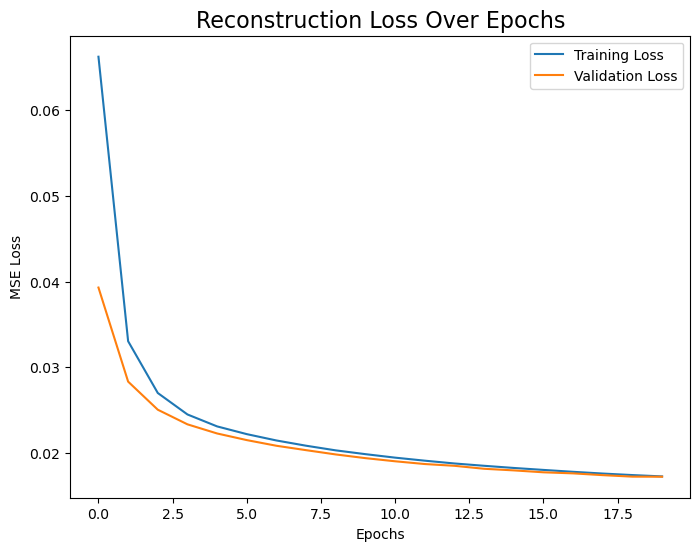

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


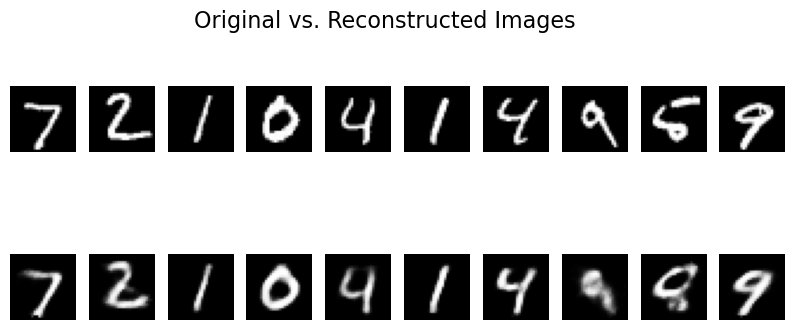

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


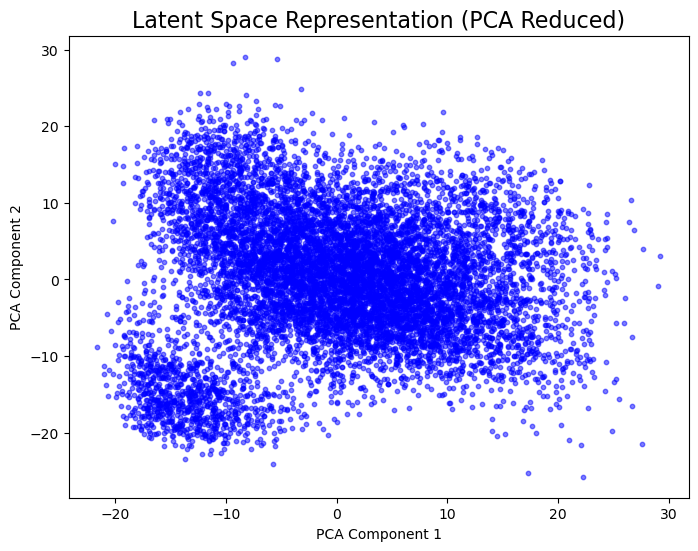

In [22]:
# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Reconstruction Loss Over Epochs", fontsize=16)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

# Use the autoencoder to reconstruct test images
reconstructed = autoencoder.predict(x_test[:10])

# Plot original vs. reconstructed images
plt.figure(figsize=(10, 4))
for i in range(10):
    # Original images
    plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.ylabel("Original", fontsize=12)
    
    # Reconstructed images
    plt.subplot(2, 10, i + 11)
    plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.ylabel("Reconstructed", fontsize=12)
plt.suptitle("Original vs. Reconstructed Images", fontsize=16)
plt.show()

# Extract latent representations for the test set
latent_representations = encoder_model.predict(x_test)

# Use PCA to reduce the latent space to 2D for visualization
pca = PCA(n_components=2)
latent_2d = pca.fit_transform(latent_representations)

# Plot the latent space
plt.figure(figsize=(8, 6))
plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c='blue', alpha=0.5, s=10)
plt.title("Latent Space Representation (PCA Reduced)", fontsize=16)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

## Joint Optimization with K-means Clustering

#### Define Autoencoder

In [23]:
# Define Autoencoder
input_dim = x_train.shape[1]
latent_dim = 10  # Adjustable latent space dimension

input_layer = Input(shape=(input_dim,))
encoder = Dense(128, activation='relu')(input_layer)
encoder = Dense(64, activation='relu')(encoder)
latent = Dense(latent_dim, activation='linear', name='latent')(encoder)

decoder = Dense(64, activation='relu')(latent)
decoder = Dense(128, activation='relu')(decoder)
output_layer = Dense(input_dim, activation='sigmoid')(decoder)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
encoder_model = Model(inputs=input_layer, outputs=latent)
autoencoder.compile(optimizer=Adam(), loss='mse')

#### Initial latent representations

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


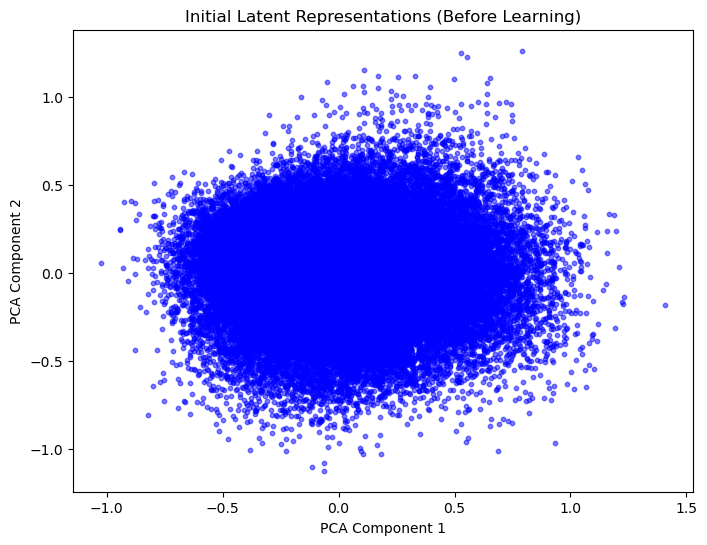

In [24]:

# initial latent representations
initial_latent = encoder_model.predict(x_train)
pca = PCA(n_components=2)
latent_2d_initial = pca.fit_transform(initial_latent)

plt.figure(figsize=(8, 6))
plt.scatter(latent_2d_initial[:, 0], latent_2d_initial[:, 1], alpha=0.5, s=10, c='blue')
plt.title("Initial Latent Representations (Before Learning)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

#### Optimize K-means

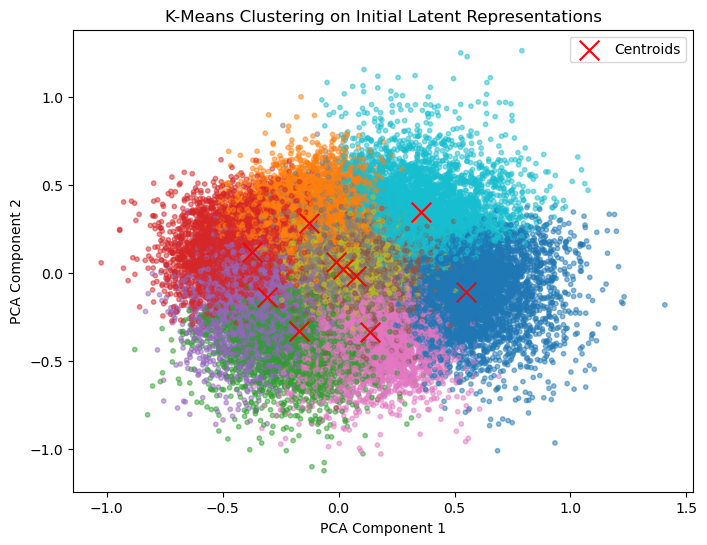

In [25]:
# Optimize K-means using latent representations
kmeans = KMeans(n_clusters=10, n_init=20)
kmeans.fit(initial_latent)
cluster_assignments = kmeans.labels_
centroids = kmeans.cluster_centers_

latent_2d_centroids = pca.transform(centroids)
plt.figure(figsize=(8, 6))
plt.scatter(latent_2d_initial[:, 0], latent_2d_initial[:, 1], alpha=0.5, s=10, c=cluster_assignments, cmap='tab10')
plt.scatter(latent_2d_centroids[:, 0], latent_2d_centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title("K-Means Clustering on Initial Latent Representations")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

#### Joint Optimization

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0973
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


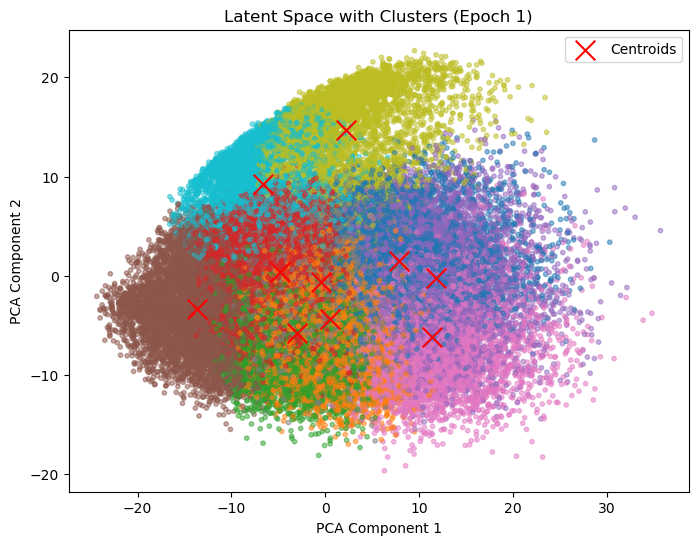

Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0359
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0287
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0254
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0236
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0225
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0217
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0210
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0205
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Epoch 11

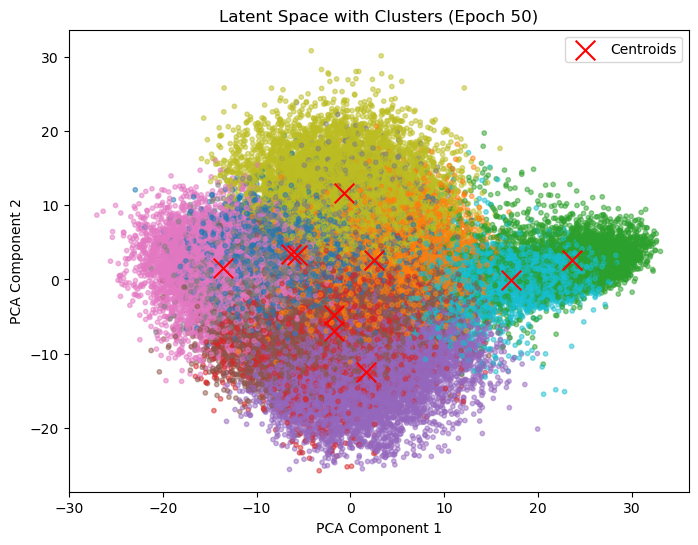

In [26]:
# Joint Optimization
max_epochs = 50
for epoch in range(max_epochs):
    print(f"Epoch {epoch + 1}/{max_epochs}")

    # Perform one AE learning iteration
    autoencoder.fit(x_train, x_train, epochs=1, batch_size=256, verbose=1)

    # Update latent representations and optimize K-means
    latent_representations = encoder_model.predict(x_train)
    kmeans.fit(latent_representations)
    new_cluster_assignments = kmeans.labels_

    # Show only the first and last latent space
    if epoch == 0 or np.all(cluster_assignments == new_cluster_assignments) or epoch == max_epochs - 1:
        latent_2d = pca.fit_transform(latent_representations)
        centroids_2d = pca.transform(kmeans.cluster_centers_)

        plt.figure(figsize=(8, 6))
        plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=new_cluster_assignments, cmap='tab10', alpha=0.5, s=10)
        plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='red', marker='x', s=200, label='Centroids')
        plt.title(f"Latent Space with Clusters (Epoch {epoch + 1})")
        plt.xlabel("PCA Component 1")
        plt.ylabel("PCA Component 2")
        plt.legend()
        plt.show()

    # Check for convergence
    if np.all(cluster_assignments == new_cluster_assignments):
        print(f"Convergence achieved at epoch {epoch + 1}.")
        break

    cluster_assignments = new_cluster_assignments

#### Original vs Reconstructed Results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


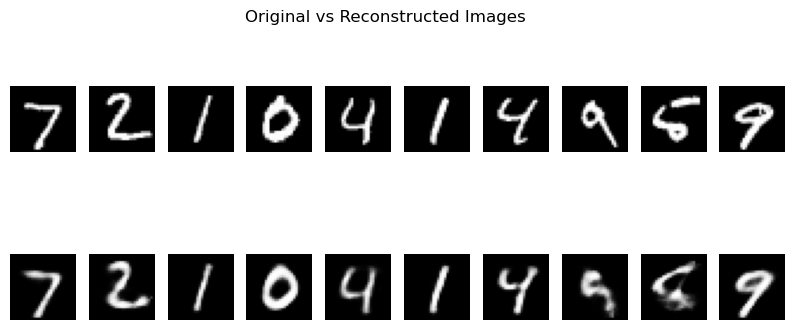

In [27]:
# Original vs Reconstructed Images
n_examples = 10
reconstructed = autoencoder.predict(x_test[:n_examples])
plt.figure(figsize=(10, 4))
for i in range(n_examples):
    # Original images
    plt.subplot(2, n_examples, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Reconstructed images
    plt.subplot(2, n_examples, n_examples + i + 1)
    plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.suptitle('Original vs Reconstructed Images')
plt.show()


## Report Performance Variations

#### Autoencoder with specified latent dimension

In [28]:
def build_autoencoder(input_dim, latent_dim):
    input_layer = Input(shape=(input_dim,))
    encoder = Dense(128, activation='relu')(input_layer)
    encoder = Dense(64, activation='relu')(encoder)
    latent = Dense(latent_dim, activation='linear', name='latent')(encoder)
    decoder = Dense(64, activation='relu')(latent)
    decoder = Dense(128, activation='relu')(decoder)
    output_layer = Dense(input_dim, activation='sigmoid')(decoder)
    autoencoder = Model(inputs=input_layer, outputs=output_layer)
    encoder_model = Model(inputs=input_layer, outputs=latent)
    return autoencoder, encoder_model

# Parameters
latent_dims = [5, 10, 20]
reconstruction_weights = [0.1, 0.5, 1.0]
input_dim = x_train.shape[1]

results = []

In [29]:
# Combined reconstruction loss plot
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

#### different latent dimensions and reconstruction weights

Testing Latent Dim: 5, Reconstruction Weight: 0.1
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Clustering Accuracy: 0.04

Testing Latent Dim: 5, Reconstruction Weight: 0.5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step
Clustering Accuracy: 0.06

Testing Latent Dim: 5, Reconstruction Weight: 1.0
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
Clustering Accuracy: 0.13

Testing Latent Dim: 10, Reconstruction Weight: 0.1
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Clustering Accuracy: 0.07

Testing Latent Dim: 10, Reconstruction Weight: 0.5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Clustering Accuracy: 0.11

Testing Latent Dim: 10, Reconstruction Weight: 1.0
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Clustering Accuracy: 0.02

Testing Latent Dim: 20, Reconstruction Weight: 0.1
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Clustering Accuracy: 0.09

Testing Latent Dim: 20, Reconstruction Weight: 0.5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Clustering Accuracy: 0.29

Testing Latent Dim: 20, Reconstruct

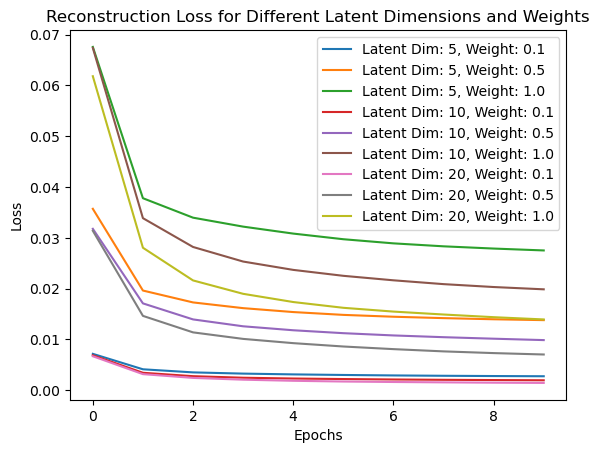

In [33]:
# Test different latent dimensions and reconstruction weights
for dim in latent_dims:
    for weight in reconstruction_weights:
        print(f"Testing Latent Dim: {dim}, Reconstruction Weight: {weight}")
        
        # Build and compile the autoencoder
        autoencoder, encoder_model = build_autoencoder(input_dim, dim)
        autoencoder.compile(optimizer=Adam(), loss='mse', loss_weights=[weight])
        
        # Train the autoencoder
        history = autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, verbose=0)
        
        # Plot reconstruction loss
        plt.plot(history.history['loss'], label=f"Latent Dim: {dim}, Weight: {weight}")
        
        # Evaluate clustering performance
        latent_representations = encoder_model.predict(x_train)
        kmeans = KMeans(n_clusters=10, n_init=20)
        kmeans.fit(latent_representations)
        acc = np.mean(kmeans.labels_ == cluster_assignments)
        print(f"Clustering Accuracy: {acc:.2f}\n")
        
        # Store results
        results.append((dim, weight, acc))

# Finalize combined plot
plt.title("Reconstruction Loss for Different Latent Dimensions and Weights")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc='upper right')
plt.show()

#### Results

In [32]:
# Summary of results
print("Summary of Results:")
for dim, weight, acc in results:
    print(f"Latent Dim: {dim}, Loss Weight: {weight}, Clustering Accuracy: {acc:.2f}")


Summary of Results:
Latent Dim: 5, Loss Weight: 0.1, Clustering Accuracy: 0.09
Latent Dim: 5, Loss Weight: 0.5, Clustering Accuracy: 0.20
Latent Dim: 5, Loss Weight: 1.0, Clustering Accuracy: 0.17
Latent Dim: 10, Loss Weight: 0.1, Clustering Accuracy: 0.10
Latent Dim: 10, Loss Weight: 0.5, Clustering Accuracy: 0.03
Latent Dim: 10, Loss Weight: 1.0, Clustering Accuracy: 0.04
Latent Dim: 20, Loss Weight: 0.1, Clustering Accuracy: 0.15
Latent Dim: 20, Loss Weight: 0.5, Clustering Accuracy: 0.12
Latent Dim: 20, Loss Weight: 1.0, Clustering Accuracy: 0.15
